# Problem 1 - Answers
**Random Dice**

#### Setup

In [1]:
%matplotlib inline

from collections import Counter
from numbers import Number

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Homogenise matplotlib plotting.
mpl.rc("axes", grid=True)
mpl.rc("grid", linestyle="--", alpha=0.4)
mpl.rc("legend", loc="best")

### Define random sample generation function for a single N-sided die

In [2]:
def random_die(size=None, n=6, rng=None):
    """Return the result(s) of random die throws.
    
    Parameters
    ----------
    size : None, int, or array-like
        The number of samples to return. If None, a single sample will be returned.
    n : int
        The number of sides of the die.
    rng : numpy random Generator or None
        Generator which can be used to make runs repeatable if given.
        
    Returns
    -------
    samples : int or array-like
        If `size` is `None`, a single random sample is returned. Otherwise,
        an array of integers is returned.
    
    """
    if rng is None:
        # Initialise the random number generator.
        rng = np.random.default_rng()

    return rng.integers(1, high=n, size=size, endpoint=True)

### Plotting a bar chart of results

In [3]:
# Make runs repeatable.
rng = np.random.default_rng(0)

# Generate the samples.
samples = random_die(1000, rng=rng)

# Count the occurrences of each roll.
occurrences = Counter(samples)
occurrences

Counter({6: 174, 4: 182, 2: 164, 1: 151, 5: 181, 3: 148})

#### The `occurrences` dictionary can be unpacked into the values and their counts using `zip`

In [4]:
values, counts = zip(*occurrences.items())
values, counts

((6, 4, 2, 1, 5, 3), (174, 182, 164, 151, 181, 148))

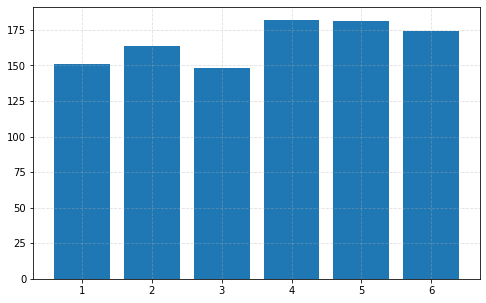

In [5]:
# Use the occurrences to plot the bar chart.
plt.figure(figsize=(8, 5))
_ = plt.bar(values, counts)

### Determine the conditional probability distribution distribution of 2 3-sided dice

#### Joint and marginal histogram plotting function

In [6]:
def plot_joint_marginal(
    df, x="die 1", y="die 2", cbar_corner=(0.05, 0.55), cbar_width=0.13, cbar_height=0.3
):
    """Plot joint and marginal histograms.
    
    Parameters
    ----------
    df : pandas DataFrame
        DataFrame containing the data.
    x : str
        x-data column name.
    y : str
        y-data column name.     
    cbar_corner : 2-tuple of float
        Lower-left corner coordinates of the colorbar axes in axes
        coordinates.
    cbar_width : float
        Colorbar axis width in axes coordinates.
    cbar_height : float
        Colorbar axis height in axes coordinates.        
    
    Returns
    -------
    joint_grid : seaborn.JointGrid instance
        Grid containing the main axes.
    cbar_ax : matplotlib Axes
        Colorbar axes.
        
    """
    # Create the individual axes using JointGrid.
    g = sns.JointGrid(data=df, x=x, y=y, marginal_ticks=True)

    # Disable the grid for the joint histogram.
    g.ax_joint.grid(False)

    # Set the x- and y-ticks.
    xticks = np.arange(np.min(df[x]), np.max(df[x]) + 1)
    yticks = np.arange(np.min(df[y]), np.max(df[y]) + 1)
    g.ax_joint.set_xticks(xticks)
    g.ax_joint.set_yticks(yticks)

    # Prevent whitespace between the spines and the joint histogram.
    g.ax_joint.set_xlim(xticks[0] - 0.5, xticks[-1] + 0.5)
    g.ax_joint.set_ylim(yticks[0] - 0.5, yticks[-1] + 0.5)
    g.ax_joint.autoscale(enable=False)

    # Create an bounding inset axis as a background for the
    # joint histogram colorbar axis.
    bound_ax = inset_axes(
        g.ax_joint,
        "100%",
        "100%",
        loc="upper left",
        bbox_to_anchor=(*cbar_corner, cbar_width, cbar_height),
        bbox_transform=g.ax_joint.transAxes,
        axes_kwargs=dict(fc=[1, 1, 1, 0.7], xticks=[], yticks=[]),
    )

    # Remove the spines.
    for spine in bound_ax.spines.values():
        spine.set_visible(False)

    # Create the joint histogram colorbar axis, within the
    # above bounding axis.
    cbar_ax = inset_axes(bound_ax, "15%", "84%", loc="center left")

    # Add the joint and marginal histogram plots
    g.plot_joint(
        sns.histplot,
        discrete=(True, True),
        cmap="light:#03012d",
        pmax=0.8,
        cbar=True,
        cbar_ax=cbar_ax,
    )

    g.plot_marginals(
        sns.histplot, element="bars", color="#03012d", discrete=True, shrink=0.7
    )
    return g, cbar_ax

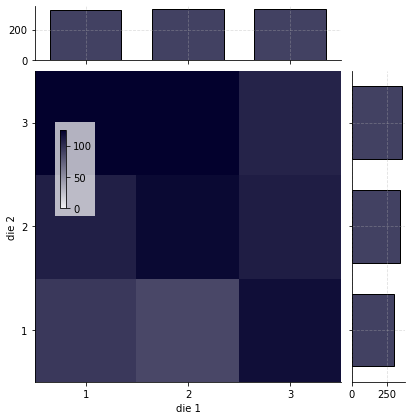

In [7]:
# Make runs repeatable.
rng = np.random.default_rng(0)

outcomes = []
for i in range(1000):
    outcomes.append([random_die(n=3, rng=rng) for i in range(2)])

# Convert to an array for easier processing.
outcomes = np.array(outcomes)

# Organise the data using a pandas DataFrame.
df = pd.DataFrame({"die 1": outcomes[:, 0], "die 2": outcomes[:, 1]})
_ = plot_joint_marginal(df)

### Determine the conditional probability distribution of one of the 2 3-sided dice and their sum

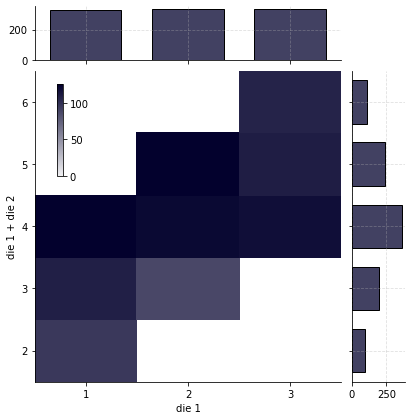

In [8]:
# Make runs repeatable.
rng = np.random.default_rng(0)

outcomes = []
for i in range(1000):
    outcomes.append([random_die(n=3, rng=rng) for i in range(2)])

# Convert to an array for easier processing.
outcomes = np.array(outcomes)

# Organise the data using a pandas DataFrame.
df = pd.DataFrame({"die 1": outcomes[:, 0], "die 1 + die 2": np.sum(outcomes, axis=1)})
_ = plot_joint_marginal(df, *df.columns, cbar_corner=(0.04, 0.65), cbar_height=0.35)

### Use the previous `random_die` function in order to generate samples from the distributions of multiple N-sided die sums

In [9]:
def random_dice(dice=None, size=None, n=6, rng=None):
    """Return the result(s) of random dice throw sums.
    
    Parameters
    ----------
    dice : int or None
        The number of dice to sum. If `dice` is None and `n` is a single int, 1 die will be 
        assumed. If multiple values are given for `n`, the number of 
        values in `n` will determine the number of dice.
    size : None, int, or array-like
        The number of samples to return. If None, a single sample will be returned.
    n : int or array-like
        The number of sides of each of the dice. If multiple values are given, each value in
        `n` will result in a die-throw using a die with the given number of sides.
    rng : numpy random Generator or None
        Generator which can be used to make runs repeatable if given.
        
    Returns
    -------
    samples : int or array-like
        If `size` is `None`, a single random sample is returned. Otherwise,
        an array of integers is returned.
    
    """
    if rng is None:
        # Initialise the random number generator.
        rng = np.random.default_rng()

    if isinstance(n, Number):
        if dice is None:
            dice = 1
        # Check if `n` is just a single number.
        n = np.ones(dice, dtype=int) * n
    else:
        n = np.asarray(n)

    return sum(random_die(size=size, n=n_i, rng=rng) for n_i in n)

### Two 4-sided dice

#### The expected distribution is the sum of two discrete uniform distributions

For a single discrete uniform distribution with $n$ values between $a$ and $b$, the probability of a given value is $1/n$.

Let $X \sim \mathcal{U}\{a,b\}$. Then for $k \in [a,b]$, $P(X=k) = 1/n$. For another discrete uniform distribution $Y \sim \mathcal{U} \{c, d\}$, with $m$ values, $P(Y=k) = 1/m$, for $k \in [c,d]$.

Denote by $Z$ the sum $X + Y$. Its probability distribution may be determined as follows:

$$P(Z=z) = \sum_{k=-\infty}^{\infty} P(X=z-k) P(Y=k).$$

Computationally, the values of $k$ that are summed over need to be determined, of course.
Both $z-k \in [a,b] \rightarrow k \in [z-b, z -a]$ and $k \in [c,d]$ need to be satisfied.
Thus,

$$P(Z=z) = \sum_{k=max\{z-b, c\}}^{min\{z-a, d\}} P(X=z-k) P(Y=k).$$
$$P(Z=z) > 0\ \text{for}\ z \in [a+c, b+d].$$

This is easily generalised to the sum of multiple discrete uniform distributions.

### Define a function to generate the expected distribution of the sums of multiple N-sided dice

In [10]:
def sum_disc_distr(*distrs):
    """Calculate the distribution of the sum of discrete uniform distributions.
    
    A recursive approach is used whereby repeated function calls are used if more 
    than two dstributions are given.
    
    Parameters
    ----------
    *distrs : pandas Series
        Series containing probabilities with the corresponding values as the index.    
    
    Returns
    -------
    sum_distr : pandas Series
        Series containing the resulting probabilities, with the corresponding values
        as the index.
        
    Raises
    ------
    ValueError : If no arguments are given.
    
    """
    if len(distrs) < 1:
        raise ValueError("At least 1 distribution must be given.")
    if len(distrs) == 1:
        # Nothing to do, simply return the distribution.
        return distrs[0]
    if len(distrs) > 2:
        # Compute the sum of the first two distributions and try again.
        return sum_disc_distr(sum_disc_distr(*distrs[:2]), *distrs[2:])

    # Here, there must be 2 distributions.
    # The distribution of their sum will be determined here.
    d1, d2 = distrs

    a = min(d1.index)
    b = max(d1.index)
    c = min(d2.index)
    d = max(d2.index)

    probabilities = {}
    for z in range(a + c, b + d + 1):
        prob = 0
        for k in range(max(z - b, c), min(z - a, d) + 1):
            prob += d1[z - k] * d2[k]
        probabilities[z] = prob
    return pd.Series(probabilities)


def sum_dice_distr(dice=None, n=6):
    """Generate the expected distribution of the sum of N-sided dice.
    
    Parameters
    ----------
    dice : int or None
        The number of dice to sum. If `dice` is None and `n` is a single int, 1 die will be 
        assumed. If multiple values are given for `n`, the number of 
        values in `n` will determine the number of dice.
    n : int or array-like
        The number of sides of each of the dice. If multiple values are given, each value in
        `n` will result in a die-throw using a die with the given number of sides.  
        
    Returns
    -------
    proportions : pandas Series
        Series containing the expected proportion of samples, with the values as the index.
    
    """
    if isinstance(n, Number):
        if dice is None:
            dice = 1
        # Check if `n` is just a single number.
        n = np.ones(dice, dtype=int) * n
    else:
        n = np.asarray(n)

    # Generate the probabilities for each of the values for each
    # of the dice.
    distributions = []
    for n_i in n:
        p = 1 / n_i
        distributions.append(pd.Series({j: p for j in range(1, n_i + 1)}))

    summed = sum_disc_distr(*distributions)
    assert np.isclose(np.sum(summed), 1)
    return summed

#### Generate numerical results and and compare these to the expected distribution on a bar chart.

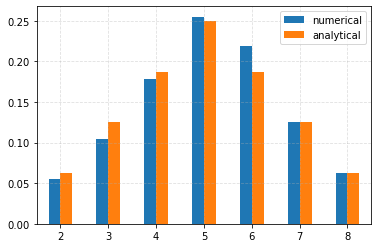

In [11]:
# Make runs repeatable.
rng = np.random.default_rng(0)

# Generate the samples.
samples = random_dice(dice=2, n=4, size=1000, rng=rng)

# Count the occurrences of each roll.
occurrences = Counter(samples)
values, counts = zip(*occurrences.items())

values = np.asarray(values)
# Sort the values.
sort_indices = np.argsort(values)
values = values[sort_indices]

# Convert to floats since we will later be computing
# the corresponding probabilities.
counts = np.asarray(counts, dtype=np.float64)
counts = counts[sort_indices]

# Normalise for comparison with the expected probabilities.
counts /= np.sum(counts)

# Compute the expected probabilities.
expected = sum_dice_distr(dice=2, n=4)
expected.name = "analytical"

df = pd.concat((pd.Series(counts, index=values, name="numerical"), expected), axis=1)

# Use the occurrences to plot the bar chart.
_ = df.plot.bar(rot=0)

### Extend the functions to handle multiple dice with different numbers of sides

#### Generate samples for the sum of 6, 8, and 10 sided dice and plot the resulting bar plots

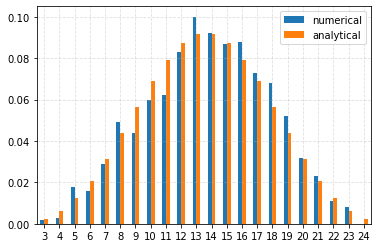

In [12]:
# Make runs repeatable.
rng = np.random.default_rng(0)

# Generate the samples.
samples = random_dice(n=(6, 8, 10), size=1000, rng=rng)

# Count the occurrences of each roll.
occurrences = Counter(samples)
values, counts = zip(*occurrences.items())

values = np.asarray(values)
# Sort the values.
sort_indices = np.argsort(values)
values = values[sort_indices]

# Convert to floats since we will later be computing
# the corresponding probabilities.
counts = np.asarray(counts, dtype=np.float64)
counts = counts[sort_indices]

# Normalise for comparison with the expected probabilities.
counts /= np.sum(counts)

# Compute the expected probabilities.
expected = sum_dice_distr(n=(6, 8, 10))
expected.name = "analytical"

df = pd.concat((pd.Series(counts, index=values, name="numerical"), expected), axis=1)

# Use the occurrences to plot the bar chart.
_ = df.plot.bar(rot=0)

In [13]:
def disc_uniform_var(a, b):
    """Variance of the discrete uniform distribution.
    
    Parameters
    ----------
    a : int
        Lowest value.
    b : int
        Highest values.
    
    Returns
    -------
    var : float
        Variance.
    
    """
    return ((b - a + 1) ** 2 - 1) / 12


def sum_dice_mean(dice=None, n=6):
    """Calculate the expected mean of the sum of N-sided dice.
    
    Parameters
    ----------
    dice : int or None
        The number of dice to sum. If `dice` is None and `n` is a single int, 1 die will be 
        assumed. If multiple values are given for `n`, the number of 
        values in `n` will determine the number of dice.
    n : int or array-like
        The number of sides of each of the dice. If multiple values are given, each value in
        `n` will result in a die-throw using a die with the given number of sides.  
        
    Returns
    -------
    mean : float
        Expected mean.
    
    """
    if isinstance(n, Number):
        if dice is None:
            dice = 1
        # Check if `n` is just a single number.
        n = np.ones(dice, dtype=int) * n
    else:
        n = np.asarray(n)

    return np.sum((n + 1) / 2)


def sum_dice_std(dice=None, n=6):
    """Calculate the expected standard deviation of the sum of N-sided dice.
    
    Parameters
    ----------
    dice : int or None
        The number of dice to sum. If `dice` is None and `n` is a single int, 1 die will be 
        assumed. If multiple values are given for `n`, the number of 
        values in `n` will determine the number of dice.
    n : int or array-like
        The number of sides of each of the dice. If multiple values are given, each value in
        `n` will result in a die-throw using a die with the given number of sides.  
        
    Returns
    -------
    mean : float
        Expected standard deviation.
    
    """
    if isinstance(n, Number):
        if dice is None:
            dice = 1
        # Check if `n` is just a single number.
        n = np.ones(dice, dtype=int) * n
    else:
        n = np.asarray(n)

    # The sum has a variance equal to the sum of the individual variances.
    total_var = 0
    for n_i in n:
        total_var += disc_uniform_var(a=1, b=n_i)

    return total_var ** 0.5

#### Compare the sample and expected mean and standard deviation

In [14]:
print(f"numerical estimates: mu={np.mean(samples):0.2f}, sigma={np.std(samples):0.2f}")
print(
    f"expected: mu={sum_dice_mean(n=(6,8,10)):0.2f}, sigma={sum_dice_std(n=(6,8,10)):0.2f}"
)

numerical estimates: mu=13.78, sigma=4.04
expected: mu=13.50, sigma=4.05
